Dodanie bibliotek

In [2]:
import xgboost as xgb
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from collections import Counter
from sklearn.metrics import classification_report
from sklearn import tree

from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE
from xgboost import XGBRFClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

Wczytanie danych oraz prezentacja

In [3]:
dtrain =pd.read_csv("D:/ml/xgboost-main/data/ssh_logs/SSH.csv")
dtrain.head()

,user,is_private,is_failure,is_root,is_valid,not_valid_count,ip_failure,ip_success,no_failure,first,td,ts,target
0,kamran,1,1,0,1,0,1,0,2,1,0,1.544679e+09,0
1,kamran,1,1,0,1,0,2,0,3,0,18,1.544679e+09,0
2,student,1,0,0,1,0,0,1,0,0,133,1.544679e+09,0
3,kamran,1,1,0,1,0,1,1,2,0,58,1.544679e+09,0
4,kamran,1,1,0,1,0,2,1,3,0,29,1.544679e+09,0


Usuniecie danych uzytkownika skad pochodzi atak oraz danych ts 

In [ ]:
dtrain = dtrain.drop(columns=['user', 'ts'])
dtrain.head()

,is_private,is_failure,is_root,is_valid,not_valid_count,ip_failure,ip_success,no_failure,first,td,target
0,1,1,0,1,0,1,0,2,1,0,0
1,1,1,0,1,0,2,0,3,0,18,0
2,1,0,0,1,0,0,1,0,0,133,0
3,1,1,0,1,0,1,1,2,0,58,0
4,1,1,0,1,0,2,1,3,0,29,0


y1 jako dane wyjsciowe oraz X1 jako dane testowe do uczenia sie

In [5]:
y1 = dtrain["target"]
X1 = dtrain.drop(columns=['target'])

In [6]:
dtrain.dtypes

is_private         int64
is_failure         int64
is_root            int64
is_valid           int64
not_valid_count    int64
ip_failure         int64
ip_success         int64
no_failure         int64
first              int64
td                 int64
target             int64
dtype: object

przygotowanie probek testowych oraz do uczenia modelu

In [7]:
X_train, X_test, y_train, y_test = train_test_split(
    X1,
    y1,
    test_size=0.2)

print(X_train.shape)
print(X_test.shape)

(226, 10)
(57, 10)


(226, 10)
(226,)
(57, 10)
(57,)


<Axes: xlabel='target'>

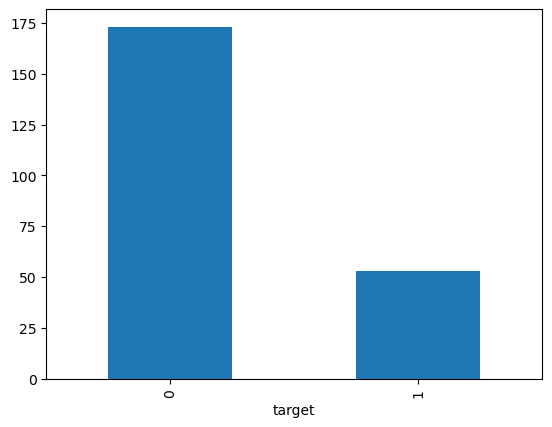

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.2, random_state=5)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
pd.Series(y_train).value_counts().plot.bar()   

**SMOTE**

In [9]:
con = Counter(y_train)
print('Przed',con)
smote = SMOTE(random_state=42)
X_train_sm, y_train_sm = smote.fit_resample(X_train,y_train)
con1 = Counter(y_train_sm)
print('Po', con1)

Przed Counter({0: 173, 1: 53})
Po Counter({0: 173, 1: 173})


Przygotowanie modelu

In [19]:
model_LR = LogisticRegression()                         #LR dla nie zbalansowanych         
model_LR_SMOTE = LogisticRegression()                   #LR dla zbalansowanych
model_RF = RandomForestClassifier(                      #random forest dla nie zbalansowanych
    n_estimators=200,
    max_depth=15,
    min_samples_split=5,      
    min_samples_leaf=2,       
    max_features='sqrt',      
    class_weight='balanced',  
    random_state=42,          
    bootstrap=True
    )                     
model_RF_SMOTE = RandomForestClassifier(                      #random forest dla zbalansowanych
    n_estimators=200,
    max_depth=15,
    min_samples_split=5,      
    min_samples_leaf=2,       
    max_features='sqrt',      
    class_weight='balanced',  
    random_state=42,          
    bootstrap=True
    )   
model_DT = DecisionTreeClassifier()                     #decision tree dla nie zbalansowanych
model_DT_SMOTE = DecisionTreeClassifier()               #decision tree dla zbalansowanych


model_LR.fit(X_train, y_train)
model_LR_SMOTE.fit(X_train_sm,y_train_sm)
model_RF.fit(X_train,y_train)
model_RF_SMOTE.fit(X_train_sm,y_train_sm)
model_DT.fit(X_train,y_train)
model_DT_SMOTE.fit(X_train_sm,y_train_sm)

c:\Users\mateu\anaconda3\envs\python8\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\mateu\anaconda3\envs\python8\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#log

DecisionTreeClassifier()

In [20]:
#LR
y_pred_LR = model_LR.predict(X_test)
print('LR dla nie zbalansowanych\n', classification_report(y_test, y_pred_LR))
y_pred_LR_SMOTE = model_LR_SMOTE.predict(X_test)
print('LR dla nie zbalansowanych\n', classification_report(y_test, y_pred_LR_SMOTE))

#RF
y_pred_RF = model_RF.predict(X_test)
print('RF dla nie zbalansowanych\n', classification_report(y_test, y_pred_RF))
y_pred_RF_SMOTE = model_RF_SMOTE.predict(X_test)
print('RF dla zbalansowanych\n', classification_report(y_test, y_pred_RF_SMOTE))

#DT
y_pred_DT = model_DT.predict(X_test)
print('DT dla nie zbalansowanych\n', classification_report(y_test, y_pred_DT))
y_pred_DT_SMOTE = model_DT_SMOTE.predict(X_test)
print('DT dla zbalansowanych\n', classification_report(y_test, y_pred_DT_SMOTE))

LR dla nie zbalansowanych
               precision    recall  f1-score   support

           0       0.98      0.93      0.95        43
           1       0.81      0.93      0.87        14

    accuracy                           0.93        57
   macro avg       0.89      0.93      0.91        57
weighted avg       0.94      0.93      0.93        57

LR dla nie zbalansowanych
               precision    recall  f1-score   support

           0       0.98      0.98      0.98        43
           1       0.93      0.93      0.93        14

    accuracy                           0.96        57
   macro avg       0.95      0.95      0.95        57
weighted avg       0.96      0.96      0.96        57

RF dla nie zbalansowanych
               precision    recall  f1-score   support

           0       0.98      0.98      0.98        43
           1       0.93      0.93      0.93        14

    accuracy                           0.96        57
   macro avg       0.95      0.95      0.95    

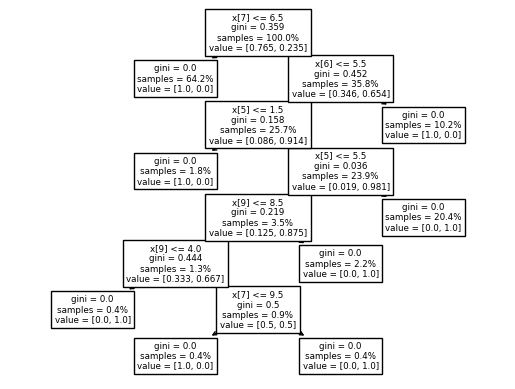

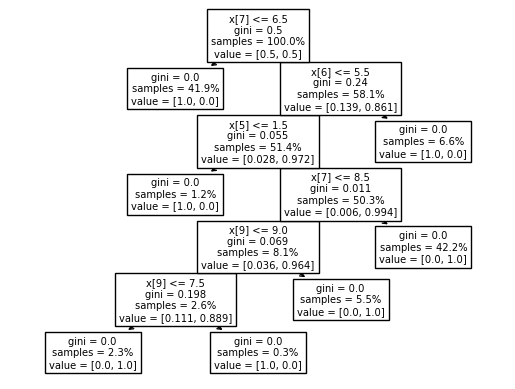

InvalidParameterError: The 'decision_tree' parameter of plot_tree must be an instance of 'sklearn.tree._classes.DecisionTreeClassifier' or an instance of 'sklearn.tree._classes.DecisionTreeRegressor'. Got RandomForestClassifier() instead.

In [ ]:
tree.plot_tree(model_DT, proportion=True)
plt.show()
tree.plot_tree(model_DT_SMOTE, proportion=True)
plt.show()
